In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generazione dataset simulato di visite al sito e-commerce
np.random.seed(42)

n_visite = 1000

# Simulazione comportamento utenti
data = {
    'visita_id': range(1, n_visite + 1),
    'ha_cliccato': np.random.choice([True, False], size=n_visite, p=[0.3, 0.7]),
    'ha_aggiunto_carrello': np.random.choice([True, False], size=n_visite, p=[0.15, 0.85]),
    'ha_acquistato': np.random.choice([True, False], size=n_visite, p=[0.05, 0.95]),
    'dispositivo': np.random.choice(['Desktop', 'Mobile', 'Tablet'], size=n_visite, p=[0.5, 0.4, 0.1]),
}

df_ecommerce = pd.DataFrame(data)

print("Dataset E-commerce generato:")
print(f"  Numero totale di visite: {len(df_ecommerce)}")
print(f"\nPrime 10 righe:")
print(df_ecommerce.head(10))

print(f"\nStatistiche descrittive:")
print(df_ecommerce.describe(include='all'))

Dataset E-commerce generato:
  Numero totale di visite: 1000

Prime 10 righe:
   visita_id  ha_cliccato  ha_aggiunto_carrello  ha_acquistato dispositivo
0          1        False                 False          False      Mobile
1          2        False                 False          False      Mobile
2          3        False                 False          False     Desktop
3          4        False                 False          False      Mobile
4          5         True                 False          False      Mobile
5          6         True                 False          False      Mobile
6          7         True                 False          False      Tablet
7          8        False                 False          False     Desktop
8          9        False                 False          False      Mobile
9         10        False                 False          False     Desktop

Statistiche descrittive:
          visita_id ha_cliccato ha_aggiunto_carrello ha_acquistato disp

In [2]:
# In[ ]:

# Spazio campionario: tutte le visite
S_visite = set(df_ecommerce['visita_id'])
print(f"Spazio campionario S (tutte le visite):")
print(f"  |S| = {len(S_visite)} visite")

Spazio campionario S (tutte le visite):
  |S| = 1000 visite


In [3]:
# Definizione di eventi
E_click = set(df_ecommerce[df_ecommerce['ha_cliccato']]['visita_id'])
E_carrello = set(df_ecommerce[df_ecommerce['ha_aggiunto_carrello']]['visita_id'])
E_acquisto = set(df_ecommerce[df_ecommerce['ha_acquistato']]['visita_id'])
E_mobile = set(df_ecommerce[df_ecommerce['dispositivo'] == 'Mobile']['visita_id'])

print(f"\nEventi definiti:")
print(f"  E_click: visite con almeno un click → |E_click| = {len(E_click)}")
print(f"  E_carrello: visite con aggiunta al carrello → |E_carrello| = {len(E_carrello)}")
print(f"  E_acquisto: visite con acquisto completato → |E_acquisto| = {len(E_acquisto)}")
print(f"  E_mobile: visite da dispositivo mobile → |E_mobile| = {len(E_mobile)}")


Eventi definiti:
  E_click: visite con almeno un click → |E_click| = 319
  E_carrello: visite con aggiunta al carrello → |E_carrello| = 157
  E_acquisto: visite con acquisto completato → |E_acquisto| = 54
  E_mobile: visite da dispositivo mobile → |E_mobile| = 400


In [4]:
# In[ ]:


# Calcolo probabilità
P_click = len(E_click) / len(S_visite)
P_carrello = len(E_carrello) / len(S_visite)
P_acquisto = len(E_acquisto) / len(S_visite)
P_mobile = len(E_mobile) / len(S_visite)

print("=" * 60)
print("PROBABILITÀ NEL BUSINESS CASE E-COMMERCE")
print("=" * 60)

print(f"\nP(Click) = {P_click:.4f} ({P_click*100:.2f}%)")
print(f"  → In media, il {P_click*100:.1f}% delle visite include almeno un click")

print(f"\nP(Carrello) = {P_carrello:.4f} ({P_carrello*100:.2f}%)")
print(f"  → In media, il {P_carrello*100:.1f}% delle visite aggiunge prodotti al carrello")

print(f"\nP(Acquisto) = {P_acquisto:.4f} ({P_acquisto*100:.2f}%)")
print(f"  → In media, il {P_acquisto*100:.1f}% delle visite completa un acquisto")

print(f"\nP(Mobile) = {P_mobile:.4f} ({P_mobile*100:.2f}%)")
print(f"  → In media, il {P_mobile*100:.1f}% delle visite proviene da mobile")

# Complemento: probabilità di NON acquistare
P_no_acquisto = 1 - P_acquisto
print(f"\nP(NON Acquisto) = 1 - P(Acquisto) = {P_no_acquisto:.4f} ({P_no_acquisto*100:.2f}%)")
print(f"  → Il {P_no_acquisto*100:.1f}% delle visite NON completa un acquisto")

PROBABILITÀ NEL BUSINESS CASE E-COMMERCE

P(Click) = 0.3190 (31.90%)
  → In media, il 31.9% delle visite include almeno un click

P(Carrello) = 0.1570 (15.70%)
  → In media, il 15.7% delle visite aggiunge prodotti al carrello

P(Acquisto) = 0.0540 (5.40%)
  → In media, il 5.4% delle visite completa un acquisto

P(Mobile) = 0.4000 (40.00%)
  → In media, il 40.0% delle visite proviene da mobile

P(NON Acquisto) = 1 - P(Acquisto) = 0.9460 (94.60%)
  → Il 94.6% delle visite NON completa un acquisto


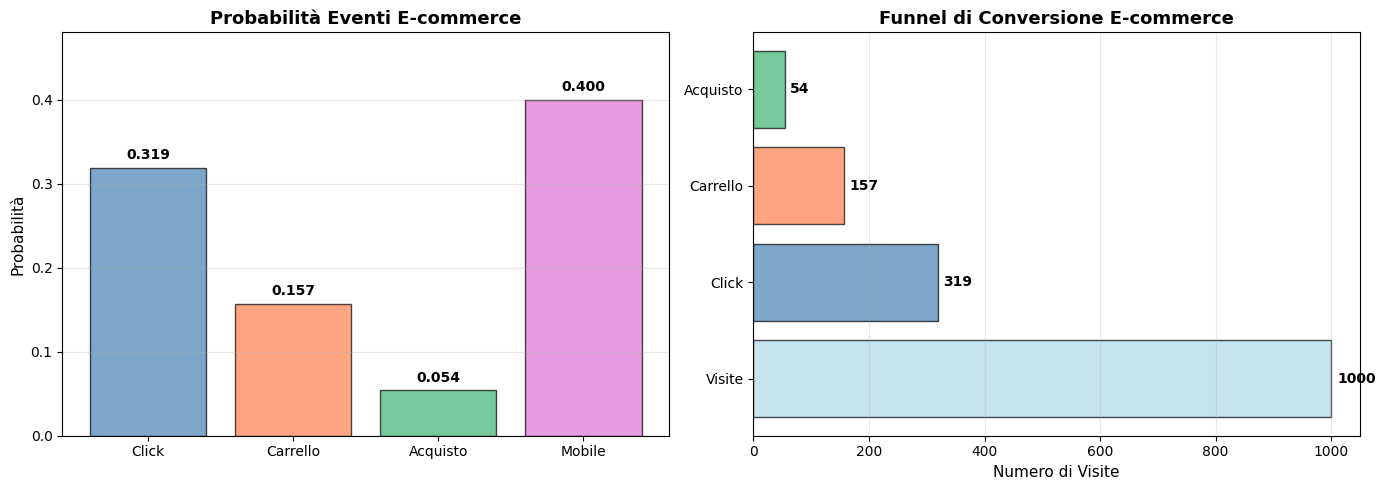


💡 Osservazione: Il funnel mostra come il numero di utenti diminuisce
   ad ogni fase del processo di acquisto.


In [5]:
# In[ ]:


# Visualizzazione delle probabilità
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico 1: Probabilità eventi principali
eventi = ['Click', 'Carrello', 'Acquisto', 'Mobile']
probabilita_eventi = [P_click, P_carrello, P_acquisto, P_mobile]
colori = ['steelblue', 'coral', 'mediumseagreen', 'orchid']

axes[0].bar(eventi, probabilita_eventi, color=colori, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Probabilità', fontsize=11)
axes[0].set_title('Probabilità Eventi E-commerce', fontsize=13, fontweight='bold')
axes[0].set_ylim(0, max(probabilita_eventi) * 1.2)
axes[0].grid(axis='y', alpha=0.3)

# Aggiunta valori sopra le barre
for i, (evento, prob) in enumerate(zip(eventi, probabilita_eventi)):
    axes[0].text(i, prob + 0.01, f'{prob:.3f}', ha='center', fontsize=10, fontweight='bold')

# Grafico 2: Funnel di conversione
funnel_labels = ['Visite', 'Click', 'Carrello', 'Acquisto']
funnel_values = [len(S_visite), len(E_click), len(E_carrello), len(E_acquisto)]
funnel_colors = ['lightblue', 'steelblue', 'coral', 'mediumseagreen']

axes[1].barh(funnel_labels, funnel_values, color=funnel_colors, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Numero di Visite', fontsize=11)
axes[1].set_title('Funnel di Conversione E-commerce', fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Aggiunta valori sulle barre
for i, (label, value) in enumerate(zip(funnel_labels, funnel_values)):
    axes[1].text(value + 10, i, f'{value}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Osservazione: Il funnel mostra come il numero di utenti diminuisce")
print("   ad ogni fase del processo di acquisto.")


In [6]:
# In[ ]:


# Unione: Click O Carrello
E_click_o_carrello = E_click.union(E_carrello)
P_click_o_carrello = len(E_click_o_carrello) / len(S_visite)

print("Operazioni sugli eventi:")
print("\n1. Unione (OR): Click O Carrello")
print(f"   |E_click ∪ E_carrello| = {len(E_click_o_carrello)}")
print(f"   P(Click ∪ Carrello) = {P_click_o_carrello:.4f}")
print(f"   → Probabilità che un utente clicchi O aggiunga al carrello")

# Intersezione: Click E Carrello
E_click_e_carrello = E_click.intersection(E_carrello)
P_click_e_carrello = len(E_click_e_carrello) / len(S_visite)

print("\n2. Intersezione (AND): Click E Carrello")
print(f"   |E_click ∩ E_carrello| = {len(E_click_e_carrello)}")
print(f"   P(Click ∩ Carrello) = {P_click_e_carrello:.4f}")
print(f"   → Probabilità che un utente clicchi E aggiunga al carrello")

# Verifica formula dell'unione
print("\n3. Verifica Formula dell'Unione:")
print(f"   P(Click ∪ Carrello) = P(Click) + P(Carrello) - P(Click ∩ Carrello)")
print(f"   {P_click_o_carrello:.4f} = {P_click:.4f} + {P_carrello:.4f} - {P_click_e_carrello:.4f}")
verifica = P_click + P_carrello - P_click_e_carrello
print(f"   {P_click_o_carrello:.4f} ≈ {verifica:.4f} ✓")

# Complemento: NON acquisto
E_no_acquisto = S_visite.difference(E_acquisto)
P_no_acquisto_calc = len(E_no_acquisto) / len(S_visite)

print("\n4. Complemento (NOT): NON Acquisto")
print(f"   |E_acquisto^c| = {len(E_no_acquisto)}")
print(f"   P(Acquisto^c) = {P_no_acquisto_calc:.4f}")
print(f"   1 - P(Acquisto) = {1 - P_acquisto:.4f}")
print(f"   Verifica: {P_no_acquisto_calc:.4f} = {1 - P_acquisto:.4f} ✓")


# In[ ]:

Operazioni sugli eventi:

1. Unione (OR): Click O Carrello
   |E_click ∪ E_carrello| = 422
   P(Click ∪ Carrello) = 0.4220
   → Probabilità che un utente clicchi O aggiunga al carrello

2. Intersezione (AND): Click E Carrello
   |E_click ∩ E_carrello| = 54
   P(Click ∩ Carrello) = 0.0540
   → Probabilità che un utente clicchi E aggiunga al carrello

3. Verifica Formula dell'Unione:
   P(Click ∪ Carrello) = P(Click) + P(Carrello) - P(Click ∩ Carrello)
   0.4220 = 0.3190 + 0.1570 - 0.0540
   0.4220 ≈ 0.4220 ✓

4. Complemento (NOT): NON Acquisto
   |E_acquisto^c| = 946
   P(Acquisto^c) = 0.9460
   1 - P(Acquisto) = 0.9460
   Verifica: 0.9460 = 0.9460 ✓
